# Data Exploration and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

In [2]:
#Load data and check the first rows
data = pd.read_csv(r"C:\Users\User\Desktop\Dataset\DogMoveData_csv_format\DogMoveData.csv")
data.head()

DogID  TestNum  t_sec   ABack_x   ABack_y   ABack_z   ANeck_x   ANeck_y  \
0     16        1   0.00  0.041504  0.938965 -0.015137 -0.067871 -0.510254   
1     16        1   0.01  0.041992  0.941895 -0.020020 -0.128906 -0.494141   
2     16        1   0.02  0.040527  0.939453 -0.004395 -0.158691 -0.480469   
3     16        1   0.03  0.021484  0.946289  0.007813 -0.122070 -0.486816   
4     16        1   0.04 -0.000977  0.951172  0.033691 -0.053711 -0.500000   

    ANeck_z    GBack_x    GBack_y   GBack_z   GNeck_x   GNeck_y    GNeck_z  \
0 -0.934570 -17.639161 -22.766115  7.446290 -7.934571  6.347657  13.427735   
1 -0.913086 -15.075685 -11.413575  4.821778 -3.906250  4.394532  16.540528   
2 -0.911133 -12.207032  -0.122070  2.807617 -0.488281 -1.953125  26.794435   
3 -0.880371  -9.460450   7.995606  1.586914  1.159668 -5.676270  38.085940   
4 -0.807129  -8.361817  14.587403 -1.037598  4.577637  4.089356  41.503909   

          Task       Behavior_1   Behavior_2   Behavior_3   PointEvent  
0  <undefined>      <undefined>  <undefined>  <undefined>  <undefined>  
1  <undefined>  Synchronization  <undefined>  <undefined>  <undefined>  
2  <undefined>  Synchronization  <undefined>  <undefined>  <undefined>  
3  <undefined>  Synchronization  <undefined>  <undefined>  <undefined>  
4  <undefined>  Synchronization  <undefined>  <undefined>  <undefined>

In [3]:
data

DogID  TestNum    t_sec   ABack_x   ABack_y   ABack_z   ANeck_x  \
0            16        1     0.00  0.041504  0.938965 -0.015137 -0.067871   
1            16        1     0.01  0.041992  0.941895 -0.020020 -0.128906   
2            16        1     0.02  0.040527  0.939453 -0.004395 -0.158691   
3            16        1     0.03  0.021484  0.946289  0.007813 -0.122070   
4            16        1     0.04 -0.000977  0.951172  0.033691 -0.053711   
...         ...      ...      ...       ...       ...       ...       ...   
10611063     74        2  1928.19  0.018066  0.436523  0.808105 -0.620605   
10611064     74        2  1928.20 -0.021973  0.515625  0.813965 -0.671875   
10611065     74        2  1928.21 -0.041504  0.507324  0.782227 -0.674805   
10611066     74        2  1928.22 -0.032715  0.484375  0.824219 -0.685059   
10611067     74        2  1928.23  0.033691  0.432617  0.785645 -0.664063   

           ANeck_y   ANeck_z    GBack_x    GBack_y    GBack_z     GNeck_x  \
0        -0.510254 -0.934570 -17.639161 -22.766115   7.446290   -7.934571   
1        -0.494141 -0.913086 -15.075685 -11.413575   4.821778   -3.906250   
2        -0.480469 -0.911133 -12.207032  -0.122070   2.807617   -0.488281   
3        -0.486816 -0.880371  -9.460450   7.995606   1.586914    1.159668   
4        -0.500000 -0.807129  -8.361817  14.587403  -1.037598    4.577637   
...            ...       ...        ...        ...        ...         ...   
10611063  0.326172 -0.647949  23.620607  75.317387  77.148442 -124.511726   
10611064  0.241211 -0.660645  34.729006  63.293461  79.956060 -116.455085   
10611065  0.244629 -0.627930  39.978030  49.316409  84.655767 -104.858405   
10611066  0.211426 -0.578613  38.024905  32.775881  89.538580  -87.463384   
10611067  0.254395 -0.527344  26.306154  19.897462  89.477545  -64.025883   

             GNeck_y     GNeck_z               Task       Behavior_1  \
0           6.347657   13.427735        <undefined>      <undefined>   
1           4.394532   16.540528        <undefined>  Synchronization   
2          -1.953125   26.794435        <undefined>  Synchronization   
3          -5.676270   38.085940        <undefined>  Synchronization   
4           4.089356   41.503909        <undefined>  Synchronization   
...              ...         ...                ...              ...   
10611063  107.727057 -122.497566  Task treat-search         Sniffing   
10611064   97.534186 -123.229988  Task treat-search         Sniffing   
10611065   95.458990 -124.816902  Task treat-search         Sniffing   
10611066  101.257330 -128.601082  Task treat-search         Sniffing   
10611067   93.688971 -128.906258  Task treat-search         Sniffing   

           Behavior_2   Behavior_3   PointEvent  
0         <undefined>  <undefined>  <undefined>  
1         <undefined>  <undefined>  <undefined>  
2         <undefined>  <undefined>  <undefined>  
3         <undefined>  <undefined>  <undefined>  
4         <undefined>  <undefined>  <undefined>  
...               ...          ...          ...  
10611063  <undefined>  <undefined>  <undefined>  
10611064  <undefined>  <undefined>  <undefined>  
10611065  <undefined>  <undefined>  <undefined>  
10611066  <undefined>  <undefined>  <undefined>  
10611067  <undefined>  <undefined>  <undefined>  

[10611068 rows x 20 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10611068 entries, 0 to 10611067
Data columns (total 20 columns):
 #   Column      Dtype  
---  ------      -----  
 0   DogID       int64  
 1   TestNum     int64  
 2   t_sec       float64
 3   ABack_x     float64
 4   ABack_y     float64
 5   ABack_z     float64
 6   ANeck_x     float64
 7   ANeck_y     float64
 8   ANeck_z     float64
 9   GBack_x     float64
 10  GBack_y     float64
 11  GBack_z     float64
 12  GNeck_x     float64
 13  GNeck_y     float64
 14  GNeck_z     float64
 15  Task        object 
 16  Behavior_1  object 
 17  Behavior_2  object 
 18  Behavior_3  object 
 19  PointEvent  object 
dtypes: float64(13), int64(2), object(5)
memory usage: 1.6+ GB


In [5]:
data.describe()

DogID       TestNum         t_sec       ABack_x       ABack_y  \
count  1.061107e+07  1.061107e+07  1.061107e+07  1.061107e+07  1.061107e+07   
mean   4.388821e+01  1.333002e+00  8.629406e+02  4.884901e-02 -1.537441e-01   
std    1.673927e+01  4.712874e-01  5.067347e+02  6.075926e-01  5.992544e-01   
min    1.600000e+01  1.000000e+00  0.000000e+00 -1.600000e+01 -1.600000e+01   
25%    2.900000e+01  1.000000e+00  4.278600e+02 -1.323240e-01 -4.599610e-01   
50%    4.500000e+01  1.000000e+00  8.557300e+02  4.492200e-02 -2.016600e-01   
75%    5.700000e+01  2.000000e+00  1.283590e+03  2.265630e-01  9.326200e-02   
max    7.400000e+01  2.000000e+00  2.176550e+03  1.599951e+01  1.599951e+01   

            ABack_z       ANeck_x       ANeck_y       ANeck_z       GBack_x  \
count  1.061107e+07  1.061107e+07  1.061107e+07  1.061107e+07  1.061107e+07   
mean   8.350742e-01 -1.701528e-01 -4.128977e-01 -6.305329e-01 -1.556436e+00   
std    5.495108e-01  6.013990e-01  6.427448e-01  6.402730e-01  7.790840e+01   
min   -1.600000e+01 -1.600000e+01 -1.600000e+01 -1.600000e+01 -2.000000e+03   
25%    7.451170e-01 -4.213870e-01 -8.188480e-01 -8.208010e-01 -1.129151e+01   
50%    8.974610e-01 -1.821290e-01 -5.742190e-01 -6.212600e-01 -6.103500e-02   
75%    9.804690e-01  6.689500e-02 -1.035160e-01 -3.769530e-01  9.948731e+00   
max    1.599951e+01  1.599951e+01  1.599951e+01  1.599951e+01  1.999939e+03   

            GBack_y       GBack_z       GNeck_x       GNeck_y       GNeck_z  
count  1.061107e+07  1.061107e+07  1.061107e+07  1.061107e+07  1.061107e+07  
mean  -8.295666e-01  2.372869e-01  6.878519e-01 -1.457102e-01  1.303734e-01  
std    1.199866e+02  7.128056e+01  7.211301e+01  1.183165e+02  6.727215e+01  
min   -2.000000e+03 -2.000000e+03 -2.000000e+03 -2.000000e+03 -1.667447e+03  
25%   -1.318360e+01 -1.300049e+01 -1.434326e+01 -1.715088e+01 -1.586914e+01  
50%   -6.103520e-01  2.441410e-01  1.220700e-01 -6.103500e-02 -6.103500e-02  
75%    1.226807e+01  1.361084e+01  1.751709e+01  1.647949e+01  1.477051e+01  
max    1.999939e+03  1.999939e+03  1.999939e+03  1.999939e+03  1.999939e+03

In [6]:
#Check the values contained in columns Behavior_1, Behavior_2, Behavior_3
print(data['Behavior_1'].value_counts(),'\n')
print(data['Behavior_2'].value_counts(),'\n')
print(data['Behavior_3'].value_counts())

<undefined>              4037199
Lying chest              1031301
Sniffing                 1026178
Playing                   862571
Panting                   836062
Walking                   728930
Trotting                  717593
Sitting                   509412
Standing                  448691
Eating                    166210
Pacing                     77104
Drinking                   64721
Shaking                    41234
Carrying object            17951
Synchronization            16755
Tugging                    13664
Galloping                  10828
Jumping                     3859
Bowing                       518
Extra_Synchronization        287
Name: Behavior_1, dtype: int64 

<undefined>        7633684
Panting             941579
Sitting             610704
Standing            574825
Tugging             236528
Eating              146501
Carrying object     122322
Lying chest          97682
Galloping            76113
Playing              73725
Walking              53863
Jumping   

In [7]:
#Get behaviors concerning movement
gal = []
sitt = []
stand = []
trot = []
walk = []
gal.append(data['Behavior_1'].value_counts()['Galloping'] + data['Behavior_2'].value_counts()['Galloping'] + data['Behavior_3'].value_counts()['Galloping'])
sitt.append(data['Behavior_1'].value_counts()['Sitting'] + data['Behavior_2'].value_counts()['Sitting']) #+ data['Behavior_3'].value_counts()['Sitting'])
stand.append(data['Behavior_1'].value_counts()['Standing'] + data['Behavior_2'].value_counts()['Standing'] + data['Behavior_3'].value_counts()['Standing'])
trot.append(data['Behavior_1'].value_counts()['Trotting'] + data['Behavior_2'].value_counts()['Trotting'] + data['Behavior_3'].value_counts()['Trotting'])
walk.append(data['Behavior_1'].value_counts()['Walking'] + data['Behavior_2'].value_counts()['Walking'] + data['Behavior_3'].value_counts()['Walking'])

   Galloping  Sitting  Standing  Trotting  Walking
0     174926  1120116   1027710    773879   783035
Galloping     174926
Sitting      1120116
Standing     1027710
Trotting      773879
Walking       783035
dtype: int64


<Axes: >

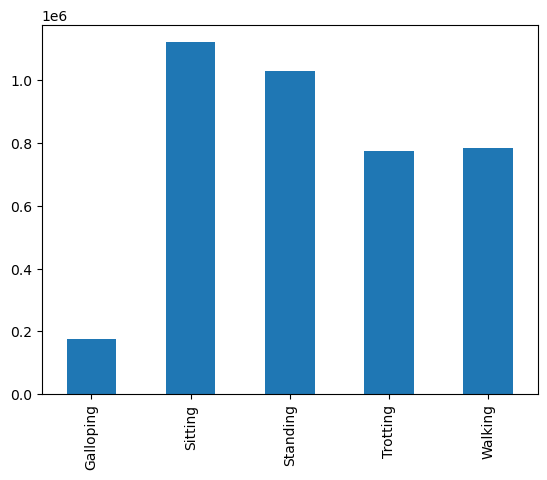

In [8]:
#How many times each value exists in the dataset
df = pd.DataFrame({'Galloping': gal, 'Sitting': sitt, 'Standing': stand, 'Trotting': trot, 'Walking': walk})
print(df)
#barchart or boxplot
print (df.sum(axis=0))
df.sum(axis=0).plot.bar()

In [9]:
#Split dataset for now
df_1 = data.iloc[:1000000,:]
#df_1 = data.iloc[1000000:2000000,:]
#df_1 = data.iloc[2000000:3000000,:]
#df_1 = data.iloc[3000000:4000000,:]
#df_1 = data.iloc[4000000:5000000,:]
#df_1 = data.iloc[5000000:6000000,:]
#df_1 = data.iloc[6000000:7000000,:]
#df_1 = data.iloc[7000000:8000000,:]
#df_1 = data.iloc[8000000:9000000,:]
#df_1 = data.iloc[9000000:,:]

In [10]:
df_1.head()

DogID  TestNum  t_sec   ABack_x   ABack_y   ABack_z   ANeck_x   ANeck_y  \
0     16        1   0.00  0.041504  0.938965 -0.015137 -0.067871 -0.510254   
1     16        1   0.01  0.041992  0.941895 -0.020020 -0.128906 -0.494141   
2     16        1   0.02  0.040527  0.939453 -0.004395 -0.158691 -0.480469   
3     16        1   0.03  0.021484  0.946289  0.007813 -0.122070 -0.486816   
4     16        1   0.04 -0.000977  0.951172  0.033691 -0.053711 -0.500000   

    ANeck_z    GBack_x    GBack_y   GBack_z   GNeck_x   GNeck_y    GNeck_z  \
0 -0.934570 -17.639161 -22.766115  7.446290 -7.934571  6.347657  13.427735   
1 -0.913086 -15.075685 -11.413575  4.821778 -3.906250  4.394532  16.540528   
2 -0.911133 -12.207032  -0.122070  2.807617 -0.488281 -1.953125  26.794435   
3 -0.880371  -9.460450   7.995606  1.586914  1.159668 -5.676270  38.085940   
4 -0.807129  -8.361817  14.587403 -1.037598  4.577637  4.089356  41.503909   

          Task       Behavior_1   Behavior_2   Behavior_3   PointEvent  
0  <undefined>      <undefined>  <undefined>  <undefined>  <undefined>  
1  <undefined>  Synchronization  <undefined>  <undefined>  <undefined>  
2  <undefined>  Synchronization  <undefined>  <undefined>  <undefined>  
3  <undefined>  Synchronization  <undefined>  <undefined>  <undefined>  
4  <undefined>  Synchronization  <undefined>  <undefined>  <undefined>

In [11]:
#Drop columns that are not needed
df_1 = df_1.drop(columns =['DogID', 'TestNum', 't_sec', 'Task', 'PointEvent'])
print(df_1.head())

    ABack_x   ABack_y   ABack_z   ANeck_x   ANeck_y   ANeck_z    GBack_x  \
0  0.041504  0.938965 -0.015137 -0.067871 -0.510254 -0.934570 -17.639161   
1  0.041992  0.941895 -0.020020 -0.128906 -0.494141 -0.913086 -15.075685   
2  0.040527  0.939453 -0.004395 -0.158691 -0.480469 -0.911133 -12.207032   
3  0.021484  0.946289  0.007813 -0.122070 -0.486816 -0.880371  -9.460450   
4 -0.000977  0.951172  0.033691 -0.053711 -0.500000 -0.807129  -8.361817   

     GBack_y   GBack_z   GNeck_x   GNeck_y    GNeck_z       Behavior_1  \
0 -22.766115  7.446290 -7.934571  6.347657  13.427735      <undefined>   
1 -11.413575  4.821778 -3.906250  4.394532  16.540528  Synchronization   
2  -0.122070  2.807617 -0.488281 -1.953125  26.794435  Synchronization   
3   7.995606  1.586914  1.159668 -5.676270  38.085940  Synchronization   
4  14.587403 -1.037598  4.577637  4.089356  41.503909  Synchronization   

    Behavior_2   Behavior_3  
0  <undefined>  <undefined>  
1  <undefined>  <undefined>  
2  <unde

In [12]:
#Add new column Behavior that consists only of movement data from columns Behavior_1, Behavior_2, Behavior_3
df_1['Behavior'] = ""
print(df_1.head())
list = ['Galloping', 'Sitting', 'Standing', 'Trotting', 'Walking']
for r in df_1.index:
    #print(r)
    for l in list:
        if df_1['Behavior_1'][r] == l or df_1['Behavior_2'][r] == l or df_1['Behavior_3'][r] == l:
            df_1['Behavior'][r] = l
            #print(df_1['Behavior_1'][r]," ",df_1['Behavior_2'][r]," ",df_1['Behavior_3'][r]," ",df_1['Behavior'][r]," ",l)
print(df_1.head())

    ABack_x   ABack_y   ABack_z   ANeck_x   ANeck_y   ANeck_z    GBack_x  \
0  0.041504  0.938965 -0.015137 -0.067871 -0.510254 -0.934570 -17.639161   
1  0.041992  0.941895 -0.020020 -0.128906 -0.494141 -0.913086 -15.075685   
2  0.040527  0.939453 -0.004395 -0.158691 -0.480469 -0.911133 -12.207032   
3  0.021484  0.946289  0.007813 -0.122070 -0.486816 -0.880371  -9.460450   
4 -0.000977  0.951172  0.033691 -0.053711 -0.500000 -0.807129  -8.361817   

     GBack_y   GBack_z   GNeck_x   GNeck_y    GNeck_z       Behavior_1  \
0 -22.766115  7.446290 -7.934571  6.347657  13.427735      <undefined>   
1 -11.413575  4.821778 -3.906250  4.394532  16.540528  Synchronization   
2  -0.122070  2.807617 -0.488281 -1.953125  26.794435  Synchronization   
3   7.995606  1.586914  1.159668 -5.676270  38.085940  Synchronization   
4  14.587403 -1.037598  4.577637  4.089356  41.503909  Synchronization   

    Behavior_2   Behavior_3 Behavior  
0  <undefined>  <undefined>           
1  <undefined>  <und

C:\Users\User\AppData\Local\Temp\ipykernel_10280\1313598788.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Behavior'][r] = l


    ABack_x   ABack_y   ABack_z   ANeck_x   ANeck_y   ANeck_z    GBack_x  \
0  0.041504  0.938965 -0.015137 -0.067871 -0.510254 -0.934570 -17.639161   
1  0.041992  0.941895 -0.020020 -0.128906 -0.494141 -0.913086 -15.075685   
2  0.040527  0.939453 -0.004395 -0.158691 -0.480469 -0.911133 -12.207032   
3  0.021484  0.946289  0.007813 -0.122070 -0.486816 -0.880371  -9.460450   
4 -0.000977  0.951172  0.033691 -0.053711 -0.500000 -0.807129  -8.361817   

     GBack_y   GBack_z   GNeck_x   GNeck_y    GNeck_z       Behavior_1  \
0 -22.766115  7.446290 -7.934571  6.347657  13.427735      <undefined>   
1 -11.413575  4.821778 -3.906250  4.394532  16.540528  Synchronization   
2  -0.122070  2.807617 -0.488281 -1.953125  26.794435  Synchronization   
3   7.995606  1.586914  1.159668 -5.676270  38.085940  Synchronization   
4  14.587403 -1.037598  4.577637  4.089356  41.503909  Synchronization   

    Behavior_2   Behavior_3 Behavior  
0  <undefined>  <undefined>           
1  <undefined>  <und

In [13]:
df_1

ABack_x   ABack_y   ABack_z   ANeck_x   ANeck_y   ANeck_z    GBack_x  \
0       0.041504  0.938965 -0.015137 -0.067871 -0.510254 -0.934570 -17.639161   
1       0.041992  0.941895 -0.020020 -0.128906 -0.494141 -0.913086 -15.075685   
2       0.040527  0.939453 -0.004395 -0.158691 -0.480469 -0.911133 -12.207032   
3       0.021484  0.946289  0.007813 -0.122070 -0.486816 -0.880371  -9.460450   
4      -0.000977  0.951172  0.033691 -0.053711 -0.500000 -0.807129  -8.361817   
...          ...       ...       ...       ...       ...       ...        ...   
999995 -0.107422  0.433105  0.849121 -0.376338  0.518857 -0.598418  -7.995606   
999996 -0.114746  0.423340  0.894043 -0.442251  0.539458 -0.607515  -7.263184   
999997 -0.154297  0.427734  0.949707 -0.498730  0.578965 -0.603398  -5.615235   
999998 -0.193848  0.433105  0.942383 -0.514771  0.622031 -0.596968   0.183105   
999999 -0.204590  0.460449  0.908691 -0.496582  0.652344 -0.573242   9.582520   

          GBack_y   GBack_z    GNeck_x    GNeck_y    GNeck_z       Behavior_1  \
0      -22.766115  7.446290  -7.934571   6.347657  13.427735      <undefined>   
1      -11.413575  4.821778  -3.906250   4.394532  16.540528  Synchronization   
2       -0.122070  2.807617  -0.488281  -1.953125  26.794435  Synchronization   
3        7.995606  1.586914   1.159668  -5.676270  38.085940  Synchronization   
4       14.587403 -1.037598   4.577637   4.089356  41.503909  Synchronization   
...           ...       ...        ...        ...        ...              ...   
999995   1.953125 -3.601074 -24.952394  61.151127 -84.101568         Sniffing   
999996   2.502442 -3.417969 -22.469484  60.665287 -73.558354         Sniffing   
999997   3.417969 -3.479004 -17.612306  60.798344 -61.010746         Sniffing   
999998   3.601074 -2.624512 -11.688843  62.250370 -47.219241         Sniffing   
999999  -0.671387 -0.854492  -7.751465  64.422611 -32.989504         Sniffing   

         Behavior_2   Behavior_3 Behavior  
0       <undefined>  <undefined>           
1       <undefined>  <undefined>           
2       <undefined>  <undefined>           
3       <undefined>  <undefined>           
4       <undefined>  <undefined>           
...             ...          ...      ...  
999995  <undefined>  <undefined>           
999996  <undefined>  <undefined>           
999997  <undefined>  <undefined>           
999998  <undefined>  <undefined>           
999999  <undefined>  <undefined>           

[1000000 rows x 16 columns]

In [15]:
#Delete any row in which the behavior label do not contain any movement data
list = ['Galloping', 'Sitting', 'Standing', 'Trotting', 'Walking']
for r in df_1.index:
    #print(r)
    if df_1['Behavior'][r]=="":
        df_1=df_1.drop(r)
#print(df_1.head())

In [16]:
df_1 = df_1.drop(columns =['Behavior_1', 'Behavior_2', 'Behavior_3'])
print(df_1.head())

       ABack_x   ABack_y   ABack_z   ANeck_x   ANeck_y   ANeck_z    GBack_x  \
9081 -0.272949  0.204102  1.185547 -0.394043 -0.187500 -0.801270 -39.489749   
9082 -0.296875 -0.004883  1.074219 -0.418457 -0.088867 -0.817383 -42.114260   
9083 -0.248535 -0.142578  0.994141 -0.440918 -0.052246 -0.799316 -41.564944   
9084 -0.170898 -0.216797  0.927246 -0.457520 -0.034668 -0.791504 -34.240725   
9085 -0.084473 -0.226563  0.871094 -0.445313 -0.052734 -0.791504 -23.376466   

        GBack_y    GBack_z    GNeck_x    GNeck_y    GNeck_z Behavior  
9081  62.500004  35.766604 -11.718751  52.185062 -75.378423  Walking  
9082  39.794924  44.250491  -5.493164  55.969242 -67.749028  Walking  
9083  12.878419  59.997562  -2.990723  54.016117 -55.236820  Walking  
9084 -14.099122  75.866704   4.333496  47.058108 -38.940432  Walking  
9085 -31.494143  91.247564  13.427735  33.508303 -23.315431  Walking  


In [17]:
df_1

ABack_x   ABack_y   ABack_z   ANeck_x   ANeck_y   ANeck_z  \
9081   -0.272949  0.204102  1.185547 -0.394043 -0.187500 -0.801270   
9082   -0.296875 -0.004883  1.074219 -0.418457 -0.088867 -0.817383   
9083   -0.248535 -0.142578  0.994141 -0.440918 -0.052246 -0.799316   
9084   -0.170898 -0.216797  0.927246 -0.457520 -0.034668 -0.791504   
9085   -0.084473 -0.226563  0.871094 -0.445313 -0.052734 -0.791504   
...          ...       ...       ...       ...       ...       ...   
990171  0.451069 -0.758340  0.915186 -0.033203 -0.584473 -0.810059   
990172  0.365781 -0.733242  0.913535 -0.041016 -0.589355 -0.818359   
990173  0.297651 -0.741812  1.020776 -0.036133 -0.611816 -0.821777   
990174  0.285889 -0.798340  1.036865 -0.013184 -0.622559 -0.852051   
990175  0.342075 -0.869463  0.968496  0.012207 -0.662109 -0.887207   

           GBack_x    GBack_y    GBack_z    GNeck_x    GNeck_y    GNeck_z  \
9081    -39.489749  62.500004  35.766604 -11.718751  52.185062 -75.378423   
9082    -42.114260  39.794924  44.250491  -5.493164  55.969242 -67.749028   
9083    -41.564944  12.878419  59.997562  -2.990723  54.016117 -55.236820   
9084    -34.240725 -14.099122  75.866704   4.333496  47.058108 -38.940432   
9085    -23.376466 -31.494143  91.247564  13.427735  33.508303 -23.315431   
...            ...        ...        ...        ...        ...        ...   
990171  103.316046 -49.770511   7.565308 -73.730473  38.696291  44.799807   
990172  103.825690 -40.192874  -3.105469 -74.707036  35.156252  49.194339   
990173  100.253302 -34.414065 -11.791993 -75.378423  32.043459  53.955081   
990174   92.895513 -27.587892 -18.188478 -76.232915  31.555178  57.067875   
990175   84.520879 -22.645875 -22.042848 -79.406743  33.264162  56.945804   

       Behavior  
9081    Walking  
9082    Walking  
9083    Walking  
9084    Walking  
9085    Walking  
...         ...  
990171  Sitting  
990172  Sitting  
990173  Sitting  
990174  Sitting  
990175  Sitting  

[350438 rows x 13 columns]

In [18]:
#Save each part of the dataset
df_1.to_csv(r"C:\Users\User\Desktop\Dataset\DogMoveData_csv_format\DogMoveData_sample_1.csv")
#df_1.to_csv(r"C:\Users\User\Desktop\Dataset\DogMoveData_csv_format\DogMoveData_sample_2.csv")
#df_1.to_csv(r"C:\Users\User\Desktop\Dataset\DogMoveData_csv_format\DogMoveData_sample_3.csv")
#df_1.to_csv(r"C:\Users\User\Desktop\Dataset\DogMoveData_csv_format\DogMoveData_sample_4.csv")
#df_1.to_csv(r"C:\Users\User\Desktop\Dataset\DogMoveData_csv_format\DogMoveData_sample_5.csv")
#df_1.to_csv(r"C:\Users\User\Desktop\Dataset\DogMoveData_csv_format\DogMoveData_sample_6.csv")
#df_1.to_csv(r"C:\Users\User\Desktop\Dataset\DogMoveData_csv_format\DogMoveData_sample_7.csv")
#df_1.to_csv(r"C:\Users\User\Desktop\Dataset\DogMoveData_csv_format\DogMoveData_sample_8.csv")
#df_1.to_csv(r"C:\Users\User\Desktop\Dataset\DogMoveData_csv_format\DogMoveData_sample_9.csv")
#df_1.to_csv(r"C:\Users\User\Desktop\Dataset\DogMoveData_csv_format\DogMoveData_sample_10.csv")

In [19]:
#Combine all dataset samples
joined_files = os.path.join(r"C:\Users\User\Desktop\Dataset\DogMoveData_csv_format", r"DogMoveData_sample_*.csv")
joined_list = glob.glob(joined_files)
df2 = pd.concat(map(pd.read_csv, joined_list), ignore_index=True)                                                        
df2                                                        

Unnamed: 0   ABack_x   ABack_y   ABack_z   ANeck_x   ANeck_y  \
0             9081 -0.272949  0.204102  1.185547 -0.394043 -0.187500   
1             9082 -0.296875 -0.004883  1.074219 -0.418457 -0.088867   
2             9083 -0.248535 -0.142578  0.994141 -0.440918 -0.052246   
3             9084 -0.170898 -0.216797  0.927246 -0.457520 -0.034668   
4             9085 -0.084473 -0.226563  0.871094 -0.445313 -0.052734   
...            ...       ...       ...       ...       ...       ...   
350433      990171  0.451069 -0.758340  0.915186 -0.033203 -0.584473   
350434      990172  0.365781 -0.733242  0.913535 -0.041016 -0.589355   
350435      990173  0.297651 -0.741812  1.020776 -0.036133 -0.611816   
350436      990174  0.285889 -0.798340  1.036865 -0.013184 -0.622559   
350437      990175  0.342075 -0.869463  0.968496  0.012207 -0.662109   

         ANeck_z     GBack_x    GBack_y    GBack_z    GNeck_x    GNeck_y  \
0      -0.801270  -39.489749  62.500004  35.766604 -11.718751  52.185062   
1      -0.817383  -42.114260  39.794924  44.250491  -5.493164  55.969242   
2      -0.799316  -41.564944  12.878419  59.997562  -2.990723  54.016117   
3      -0.791504  -34.240725 -14.099122  75.866704   4.333496  47.058108   
4      -0.791504  -23.376466 -31.494143  91.247564  13.427735  33.508303   
...          ...         ...        ...        ...        ...        ...   
350433 -0.810059  103.316046 -49.770511   7.565308 -73.730473  38.696291   
350434 -0.818359  103.825690 -40.192874  -3.105469 -74.707036  35.156252   
350435 -0.821777  100.253302 -34.414065 -11.791993 -75.378423  32.043459   
350436 -0.852051   92.895513 -27.587892 -18.188478 -76.232915  31.555178   
350437 -0.887207   84.520879 -22.645875 -22.042848 -79.406743  33.264162   

          GNeck_z Behavior  
0      -75.378423  Walking  
1      -67.749028  Walking  
2      -55.236820  Walking  
3      -38.940432  Walking  
4      -23.315431  Walking  
...           ...      ...  
350433  44.799807  Sitting  
350434  49.194339  Sitting  
350435  53.955081  Sitting  
350436  57.067875  Sitting  
350437  56.945804  Sitting  

[350438 rows x 14 columns]

In [20]:
for col in df2.columns:
    print(col)

Unnamed: 0
ABack_x
ABack_y
ABack_z
ANeck_x
ANeck_y
ANeck_z
GBack_x
GBack_y
GBack_z
GNeck_x
GNeck_y
GNeck_z
Behavior


In [21]:
df2 = df2.drop(["Unnamed: 0"],axis=1)
df2

ABack_x   ABack_y   ABack_z   ANeck_x   ANeck_y   ANeck_z  \
0      -0.272949  0.204102  1.185547 -0.394043 -0.187500 -0.801270   
1      -0.296875 -0.004883  1.074219 -0.418457 -0.088867 -0.817383   
2      -0.248535 -0.142578  0.994141 -0.440918 -0.052246 -0.799316   
3      -0.170898 -0.216797  0.927246 -0.457520 -0.034668 -0.791504   
4      -0.084473 -0.226563  0.871094 -0.445313 -0.052734 -0.791504   
...          ...       ...       ...       ...       ...       ...   
350433  0.451069 -0.758340  0.915186 -0.033203 -0.584473 -0.810059   
350434  0.365781 -0.733242  0.913535 -0.041016 -0.589355 -0.818359   
350435  0.297651 -0.741812  1.020776 -0.036133 -0.611816 -0.821777   
350436  0.285889 -0.798340  1.036865 -0.013184 -0.622559 -0.852051   
350437  0.342075 -0.869463  0.968496  0.012207 -0.662109 -0.887207   

           GBack_x    GBack_y    GBack_z    GNeck_x    GNeck_y    GNeck_z  \
0       -39.489749  62.500004  35.766604 -11.718751  52.185062 -75.378423   
1       -42.114260  39.794924  44.250491  -5.493164  55.969242 -67.749028   
2       -41.564944  12.878419  59.997562  -2.990723  54.016117 -55.236820   
3       -34.240725 -14.099122  75.866704   4.333496  47.058108 -38.940432   
4       -23.376466 -31.494143  91.247564  13.427735  33.508303 -23.315431   
...            ...        ...        ...        ...        ...        ...   
350433  103.316046 -49.770511   7.565308 -73.730473  38.696291  44.799807   
350434  103.825690 -40.192874  -3.105469 -74.707036  35.156252  49.194339   
350435  100.253302 -34.414065 -11.791993 -75.378423  32.043459  53.955081   
350436   92.895513 -27.587892 -18.188478 -76.232915  31.555178  57.067875   
350437   84.520879 -22.645875 -22.042848 -79.406743  33.264162  56.945804   

       Behavior  
0       Walking  
1       Walking  
2       Walking  
3       Walking  
4       Walking  
...         ...  
350433  Sitting  
350434  Sitting  
350435  Sitting  
350436  Sitting  
350437  Sitting  

[350438 rows x 13 columns]

In [ ]:
df2.to_csv(r"C:\Users\User\Desktop\Dataset\DogMoveData_csv_format\DogMoveData_merged.csv")